# Problem 1 (Practice)

Consider the integral
\begin{align*}
  I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] dx.
\end{align*}

(a) Write a program to evaluate the integral using the "hit-or-miss" Monte Carlo method with 100 sample points. Try the evaluation 1,000 times and print out the mean and standard deviation using np.mean and np.std. Considering that the true value of the integral is 1.4514015, what is the percentage error of the mean? (20 pts)

In [2]:
'''
Define integrand f(x) first. The domain is x = [0, 2] and y = [0, 1]. The true value of the integral is 1.4514015.
Print the mean and standard deviation of the estimated integral value and the percentage error of the mean.
During the iteration, we compute P = I/2 => I = 2P
'''

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(1 / (x * (2 - x)))**2

N = 100
iter = 1000
I = np.empty(iter)
true_value = 1.4514015

for i in range(iter):
    x = np.random.rand(N)*2
    y = np.random.rand(N)
    I[i] = 2 * np.mean(y < f(x))
    
print(np.mean(I), np.std(I))
print((np.abs(true_value - np.mean(I)) / true_value )*100)

1.4526 0.08812059918089528
0.08257535905811592


The percentage error is computed via $\text{100} \times \frac{|\text{true value} - \text{estimated valude}|}{\text{true value}}$
This percentage error is printed above 0.08257535905811592 (different when resimulate)

(b) Apply the same algorithm for $N=10^2,10^3,10^4,10^5$ with 1,000 iterations each. Plot the standard deviation as a function of $N$, in log-log scale. How does the standard deviation scale with $N$? Does this confirm your expectations of the scaling?

(40 pts)

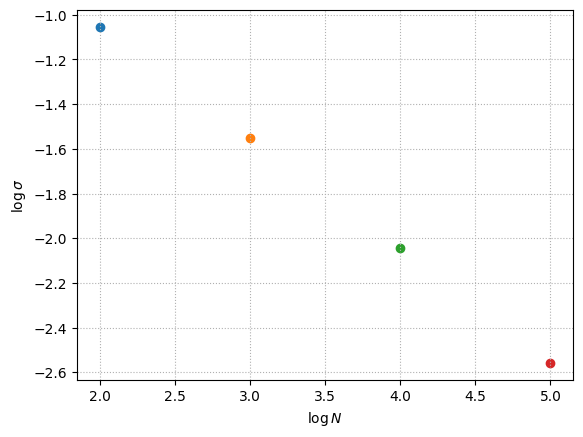

In [ ]:
'''
Compute P = I/2 => I = 2P for each N with 1000 iterations
'''
mc_mean_list = []
I = np.empty(iter)

for N in [int(1e2), int(1e3), int(1e4), int(1e5)]:
    for i in range(iter):
        x = np.random.rand(N)*2
        y = np.random.rand(N)
        I[i] = 2 * np.mean(y < f(x))
    mc_mean_list.append(np.mean(I))
    plt.scatter(np.log10(N), np.log10(np.std(I)))
plt.xlabel('$\log N$')
plt.ylabel('$\log \sigma$')
plt.grid(True, which='both', ls=':')
plt.show()

- The loglog plot shows that y component looks like linearly decreasing scale on logN
- It confirms the expectation for MC method $\sigma$ should decrease with N

(c) Now repeat (b) with the mean value method. Is it more or less precise than the hit-or-miss Monte Carlo method? Does the scaling change? (40 pts)

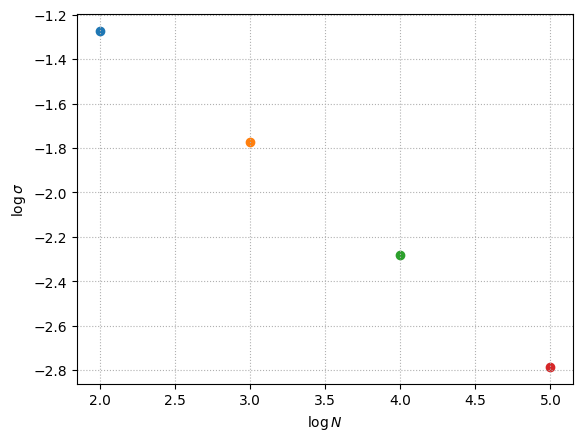

In [ ]:
'''
Repeat the process with MV method and plot the results as loglog scale
'''

mv_mean_list = []
I = np.empty(iter)

for N in [int(1e2), int(1e3), int(1e4), int(1e5)]:
    for i in range(iter):
        x = np.random.rand(N)*2
        I[i] = 2/N * np.sum(f(x))
    plt.scatter(np.log10(N), np.log10(np.std(I)))
    mv_mean_list.append(np.mean(I))
plt.xlabel('$\log N$')
plt.ylabel('$\log \sigma$')
plt.grid(True, which='both', ls=':')
plt.show()

- Precision: 
    - Below results show that MV method has the low percentage error of the mean, which means the MV method has more precise than MC method
    - Above loglog plots mean log $\sigma$ on y-axis are lower for each log N compared to the MC plot, which means the mean value method is more precise than the MC method since 
- Scaling: y component still looks like linearly decreasing with logN

In [220]:
print(np.mean(mc_mean_list))
print(np.mean(mv_mean_list))

print(true_value)
print((np.abs(true_value - np.mean(mc_mean_list)) / true_value )*100)
print((np.abs(true_value - np.mean(mv_mean_list)) / true_value )*100)

1.4515777699999999
1.4514291430296067
1.4514015
0.01214481313405473
0.0019045749647269958


---
# Problem 2

Calculate a value for the integral
\begin{align*}
  I = \int_0^1 \frac{x^{-1/2}}{e^x+1}dx
\end{align*}
using the importance sampling formula in the lecture notes, as follows.

(a) Plot the integrand in the domain. Is there a divergence and where? (10 pts)

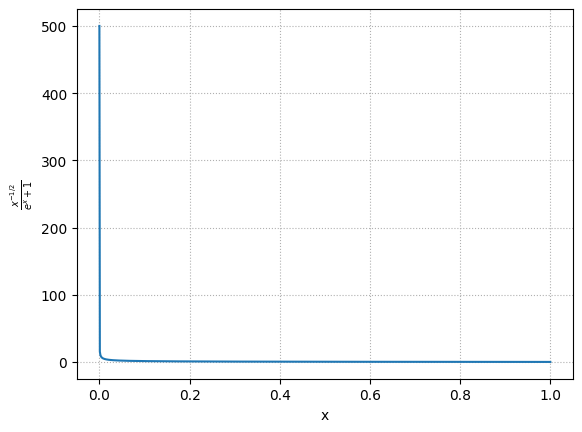

In [221]:
'''
Define the integrand f(x) and plot it on the (0,1]
We exclude endpoint 0 since the integrand diverges as x -> 0
'''

def f(x):
    return x**-0.5 / (np.exp(x) + 1)

x = np.linspace(1e-6, 1.0, 1000)

plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel(r"$\frac{x^{-1/2}}{e^x+1}$")
plt.grid(True, which='both', ls=':')
plt.show()

- Integrand diverges as x -> 0

(b) Use the mean value method to evaluate the integral 10,000 times, for $N=100$. What is the mean and standard deviation, using np.mean and np.std (Run the entire code a couple of times and present a reasonable standard deviation). (20 pts)

In [229]:
'''
Adjust the mean value method 
Repeat the whole code cell 10 times and record it below
'''

iter = 10000
N = 100
I = np.empty(iter)

for i in range(iter):
    x = np.random.rand(N)
    I[i] = (1/N) * np.sum(f(x))

mv_mean = np.mean(I)
mv_std = np.std(I)
print(f'{mv_mean}, {mv_std}')

0.8418047323397871, 0.20075215879269792


Repeat the code cell 5 times and record it below

0.8370179065418993, 0.15355004330715455

0.8402350095373604, 0.17838452847476688

0.836641647381451, 0.1645126348916913

0.841800856503697, 0.38252880948367896

0.8418047323397871, 0.20075215879269792


We present the reasonable mean and standard deviation as the average of the above values
- avg_mv_mean: 0.83950003
- avg_mv_std: 0.215945635

(c) Now let us use the importance sampling method to more correctly evaluate the integral. By inspection, the probability density function $p(x)=Ax^{-1/2}$ should be a good candidate. What is $A$? (10 pts)

The pdf $p(x) = Ax^{-1/2}$ must satisfies $\int_0^1 p(x) dx = 1$

$$\int_0^1 Ax^{-1/2} dx = 1$$
$$A \left[ \frac{x^{1/2}}{1/2} \right]_0^1 = 1$$
$$A \left[ 2\sqrt{x} \right]_0^1 = 1$$
$$A (2 - 0) = 1$$
$$2A = 1$$
$$A = \frac{1}{2}$$

Thus, the pdf is $p(x) = \frac{1}{2}x^{-1/2}$

(d) We want to sample from $p(x)$ given a uniformly distributed variable $\eta_i$ as $x_i = s(\eta_i)$. What is $s(\eta)$? (20 pts)

The CDF, $P(x)$, is

$$
P(x) = \int_0^x p(t) dt = \int_0^x \frac{1}{2}t^{-1/2} dt = \frac{1}{2} \left[ 2\sqrt{t} \right]_0^x = \sqrt{x} - 0 = \sqrt{x}
$$

So,

$$\eta = P(x) = \sqrt{x},\ x = \eta^2$$

Thus, the sampling function is $s(\eta) = \eta^2$

(e) Write a code the uses 100 random samples from $p(x)$ and use this to calculate $I$ 10,000 times, as in (b). What is the mean and the standard deviation? Is it better than the mean value method? (40 pts)

In [3]:
'''
Use the above (c), (d) proof, we implement the importance sampling method
weight is f(x)/p(x) = 2/(exp(x)+1)
'''

iter = 10000
N = 100
I = np.empty(iter)

for i in range(iter):
    u = np.random.rand(N)
    x = u**2
    weights = 2 / (np.exp(x)+1)
    I[i] = (1/N) * np.sum(weights)

is_mean = np.mean(I)
is_std = np.std(I)
print(f'{is_mean}, {is_std}')

0.8389788889488664, 0.014160340233926426


For determine the better method between important sampling(IS) and mean value(MV) method, we repeat again IS code cell 5 times and compute the avg of mean and std and then compare the avg std between IS and MV

Repeat the IS code cell 10 times and record it below

0.838896654407297, 0.014224875936502157

0.8388668623716711, 0.014065220627420051

0.8388625110558576, 0.014073158099221057

0.8391241203364241, 0.01394893009493756

0.8388570626973147, 0.013901047025568916

The avg mean and std of above are
- avg_mean: 0.838921442
- avg_std: 0.014042646


IS_avg_std 0.014042646 is smaller than MV_avg_std 0.215945635, which conclude that importance sampling method is better (more precise) for this integral.